In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

## Costos marginales

In [3]:
#Datos de los costos marginales reales observados
df_cm=pd.read_csv("costo_marginal_real.csv")

#Datos de los costos marginales reales observados
df_cp=pd.read_csv("costo_marginal_programado.csv")

In [4]:
df_cm.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre
0,BA01T005SE075T005,BA02T002SE032T002,2019-04-06,25,62.24,41.47176,BA S/E LORETO 15KV
1,BA01T005SE175T005,BA02T002SE032T002,2019-04-06,25,62.56,41.68498,BA S/E RETIRO 13.2KV
2,BA03R002SE002R002,BA02T002SE032T002,2019-04-06,25,60.04,40.00585,BA S/E ALTAMIRANO 12.5KV BP1
3,BA01R002SE012R002,BA02T002SE032T002,2019-04-06,25,61.65,41.07863,BA S/E CURACAVI 44KV B1
4,BA03R002SE013R002,BA02T002SE032T002,2019-04-06,25,59.55,39.67936,BA S/E EL MANZANO (ENEL DISTRIBUCIÓN) 23KV BP1


In [5]:
df_cp.head()

,mnemotecnico_barra,nombre_barra,fecha,hora,costo
0,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,1,49.897334
1,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,2,50.471616
2,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,3,50.077821
3,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,4,49.796216
4,BA01T002SE002T002,BA S/E ALTO JAHUEL 110KV SECCION 1,2019-01-01,5,49.796216


In [9]:
#Se modifica el nombre de la primera columna de df_cost_prog, y se pasa la lista
#con todos los nombres, para poder realizar el marge

df_cp.columns= ['barra_mnemotecnico', 'nombre_barra', 'fecha', 'hora', 'costo']

In [10]:
costo_marginal=pd.merge(df_cm,df_cp,on=['barra_mnemotecnico', 'fecha', 'hora'])

In [11]:
#Para realizar el merge tome en cuenta la fecha y la hora tambien, para no tener, filas
# no tener filas que tengan la misma barra pero con horas y fechas distintas

In [12]:
costo_marginal.head()

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo
0,BA01G021SE018G021,BA02T002SE032T002,2019-04-06,25,58.02,38.65989,BA S/E CENTRAL QUINTERO 220KV,BA S/E CENTRAL QUINTERO 220KV,54.292145
1,BA01T018SE001T018,BA02T002SE032T002,2019-04-06,25,63.60,42.37795,BA S/E NUEVA PICHIRROPULLI 220KV B1,BA S/E NUEVA PICHIRROPULLI 220KV B1,60.620648
2,BA02T005SE055T005,BA02T002SE032T002,2019-04-06,25,62.78,41.83157,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,BA S/E SAN FRANCISCO DE MOSTAZAL 66KV T1,59.177969
3,BA01T002SE029T002,BA02T002SE032T002,2019-04-06,25,58.55,39.01304,BA S/E CENTRAL PEHUENCHE 220KV B1,BA S/E CENTRAL PEHUENCHE 220KV B1,54.566605
4,BA01R002SE041R002,BA02T002SE032T002,2019-04-06,25,60.39,40.23906,BA S/E SAN CRISTOBAL 110KV B1,BA S/E SAN CRISTOBAL 110KV B1,56.086260


In [13]:
costo_marginal.describe()

,hora,costo_en_dolares,costo_en_pesos,costo
count,913388.000000,913388.000000,913388.000000,913388.000000
mean,12.502901,58.566654,39.512227,61.888004
std,6.924006,23.276453,15.555780,23.806896
min,1.000000,0.000000,0.000000,-12.113677
25%,7.000000,48.440000,32.559880,49.981588
50%,13.000000,53.330000,35.965290,55.057527
75%,19.000000,60.890000,41.258260,64.181228
max,25.000000,791.140000,523.418220,610.600000


<AxesSubplot:xlabel='costo_en_dolares'>

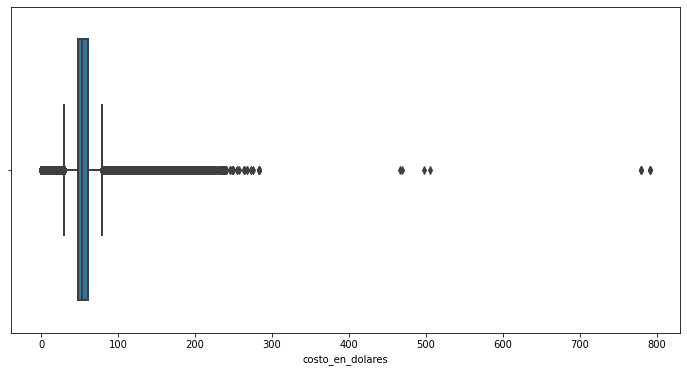

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(x=costo_marginal["costo_en_dolares"], linewidth=2)

<AxesSubplot:xlabel='costo'>

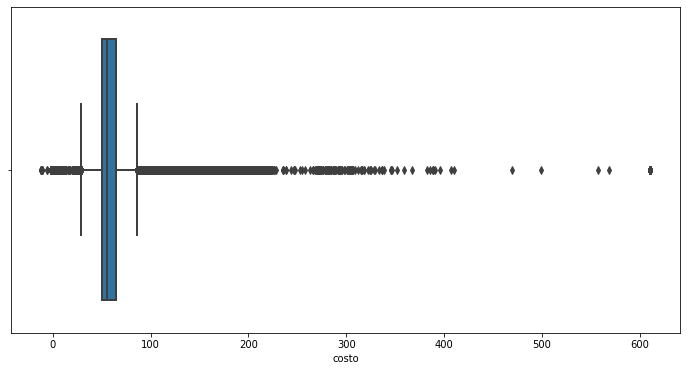

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x=costo_marginal["costo"], linewidth=2)

(array([8.07629e+05, 9.50480e+04, 1.06570e+04, 4.20000e+01, 0.00000e+00,
        2.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00, 8.00000e+00]),
 array([  0.   ,  79.114, 158.228, 237.342, 316.456, 395.57 , 474.684,
        553.798, 632.912, 712.026, 791.14 ]),
 <BarContainer object of 10 artists>)

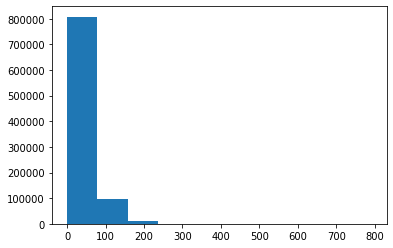

In [24]:
plt.hist(costo_marginal['costo_en_dolares'])

(array([2.36274e+05, 6.41595e+05, 2.74710e+04, 7.86600e+03, 7.50000e+01,
        4.40000e+01, 1.10000e+01, 1.00000e+00, 1.00000e+00, 5.00000e+01]),
 array([-12.11367675,  50.15769092, 112.4290586 , 174.70042628,
        236.97179395, 299.24316162, 361.5145293 , 423.78589697,
        486.05726465, 548.32863233, 610.6       ]),
 <BarContainer object of 10 artists>)

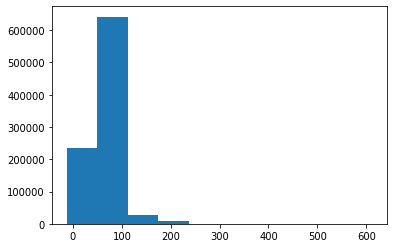

In [25]:
plt.hist(costo_marginal['costo'])

In [29]:
costo_marginal.isna().sum()

barra_mnemotecnico               0
barra_referencia_mnemotecnico    0
fecha                            0
hora                             0
costo_en_dolares                 0
costo_en_pesos                   0
nombre                           0
nombre_barra                     0
costo                            0
dtype: int64

In [31]:
costo_marginal.dtypes

barra_mnemotecnico                object
barra_referencia_mnemotecnico     object
fecha                             object
hora                               int64
costo_en_dolares                 float64
costo_en_pesos                   float64
nombre                            object
nombre_barra                      object
costo                            float64
dtype: object

In [35]:
#Ya que la columna fecha se encuentra en string la pasamos a formato fecha
costo_marginal['fecha']=pd.to_datetime(costo_marginal['fecha'])

In [32]:
len(costo_marginal)

913388

In [34]:
len(costo_marginal['barra_mnemotecnico'].unique()), len(df_cp['barra_mnemotecnico'].unique()),len(df_cm['barra_mnemotecnico'].unique())

(220, 239, 1020)

In [36]:
#Bueno según viendo el describe y los distintos graficos que coloque, y otras cosas que 
# realice, vemos que tenemos 9 variables ninguna tiene NA, la columna de fecha
# era un string, pero la modifique a formato fecha, la columna costo_en_dolares representa al costo real
# y la columna costo seria el costo programado aunque no especifica si es en dolares
# o pesos asumo que es en dolares por lo cercano de los valores, de la columna costo_en_dolares 
# y costo, tenemos la columna de barra_mnemotecnico, fecha y hora que traian los 
# dos data set, según el histograma, no parecn seguir una distribución normal, sobretodo
# en la columna de costo en dolares, por otra partese puede notar en el describe que
# que el valor maximo del costo marginal real(costo_en_dolares) como el programado(costo), esta
# muy lejos del valor que representa el tercer quantil, lo que podia indicar outliers, 
# viendo el boxplot se reafirma esto, ya que se notan muchos valores fuera de los bigotes
# sobre todo en el caso del costo marginal programado, y existen valores negativos en los
# costos programados, podrian ser algún error de tipeo.
# Ademas se tiene 913.388 filas, y hay 220 barras diferentes, barras para las cuales tenemos
#tanto costo marginal real como el programado.
#antes del merge teniamos 239 barras para los datos con los costos merginales programados y 1020 para 
#para los costos marginales reales.

## Construcción de variables

In [37]:
#Diferencia entre el costo real y el programado
costo_marginal['desviacion']= costo_marginal['costo_en_dolares'] - costo_marginal['costo']

#Diferencia entre el costo real y el programado en porcentaje
costo_marginal['desviacion_pct']= costo_marginal['desviacion']*100/costo_marginal['costo_en_dolares']

In [39]:
#variable categorica que indica que si hay una desviacion mayor al 15%
#el valor es uno de lo contrario es cero.
costo_marginal['desviacion_cat']=np.where(costo_marginal['desviacion_pct'].abs()>15,1,0)

In [51]:
#ordenamos los datos
costo_marginal=costo_marginal.sort_values(['barra_mnemotecnico','fecha','hora'])
costo_marginal

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo,desviacion,desviacion_pct,desviacion_cat
33176,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,1,50.41,35.06973,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.116286,0.293714,0.582649,0
71356,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,2,50.41,35.06973,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.522836,-0.112836,-0.223836,0
109429,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,3,49.40,34.36709,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.119505,-0.719505,-1.456487,0
147309,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,4,48.56,33.78271,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,49.854087,-1.294087,-2.664924,0
185370,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,5,46.51,32.35654,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,49.854087,-3.344087,-7.190039,0
...,...,...,...,...,...,...,...,...,...,...,...,...
756069,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,20,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,46.800602,0.989398,2.070304,0
794030,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,21,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,48.607941,-0.817941,-1.711531,0
832100,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,22,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,48.537587,-0.747587,-1.564316,0
870153,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,23,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,47.783023,0.006977,0.014599,0


<Figure size 864x432 with 0 Axes>

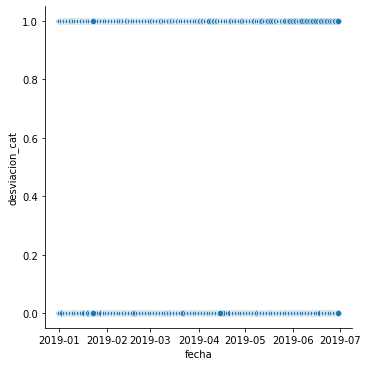

In [49]:
plt.figure(figsize=(12,6))
sns.relplot(x = 'fecha', y = "desviacion_cat",data = costo_marginal)

In [52]:
costo_marginal['desviacion_cat'].value_counts()

0    665213
1    248175
Name: desviacion_cat, dtype: int64

In [ ]:
#La variable 'desviacion_cat' indica en el caso del 1 es que la desviacion en porcentaje
#del costo marginal real y programado sea mayor a 15% lo se podia considerar 
#un número importante, asi que seguiria como que el 1 representa una desviacion significativa
#y el 0 que no hubo desviación o no es tan dignificativa.

#Según la grafica de arriba y el pequeño vistazo a los datps, podemos notar que 
#que puede ocurrir tener 0 tanto para la fecha más lejana como para la cercana,
# así el cambio no parece depender del tiempo.

## Visualización de datos

In [61]:
def time_plot_costo_barra(codigo_barra, fecha_inicial, fecha_final):
    #Pasamos las fechas a datetime, para tenerlo en formato fecha
    fecha_inicial=pd.to_datetime(fecha_inicial)
    fecha_final=pd.to_datetime(fecha_final)
    #la condición para obtener los datos que necesitamos, que pertenazcan a la barra dada y en el lapso 
    #que recibimos
    cond=((costo_marginal['barra_mnemotecnico']==codigo_barra)& (costo_marginal['fecha']>= fecha_inicial) & (costo_marginal['fecha']<fecha_final))
    df_cond=costo_marginal[cond]
    ##ordenamos los datos para que no haya algo raro en la grafica
    df_cond=df_cond.sort_values(['fecha','hora'])
    #los datos que utilizaremos para el plot
    cmg_real=df_cond['costo_en_dolares']
    cmg_prog=df_cond['costo']
    fechas_=df_cond['fecha']
    
    plt.figure(figsize=(14,8))
    plt.plot(fechas_,cmg_real)
    plt.plot(fechas_,cmg_prog)
    plt.legend(['cmg_real','cmg_prog'])
    plt.show()


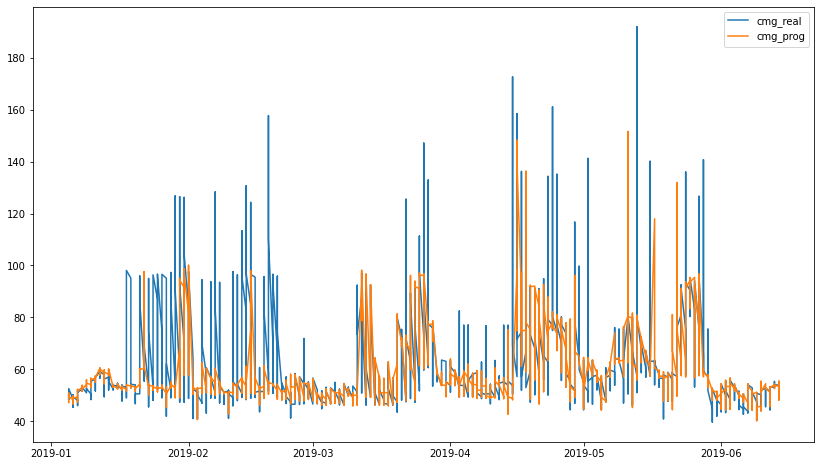

In [62]:
codigo_de_barra='BA02T002SE032T002'
fecha_ini='2019-01-05'
fecha_fin='2019-06-15'
time_plot_costo_barra(codigo_de_barra, fecha_ini, fecha_fin)

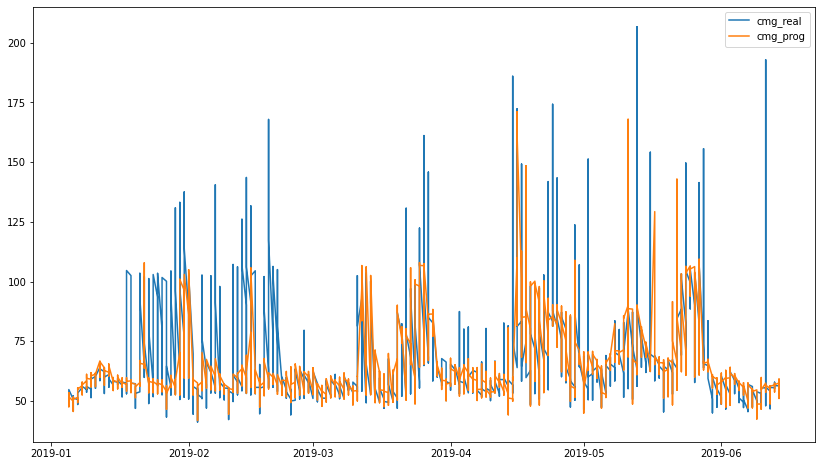

In [70]:
codigo_de_barra='BA02T005SE055T005'
fecha_ini='2019-01-05'
fecha_fin='2019-06-15'
time_plot_costo_barra(codigo_de_barra, fecha_ini, fecha_fin)

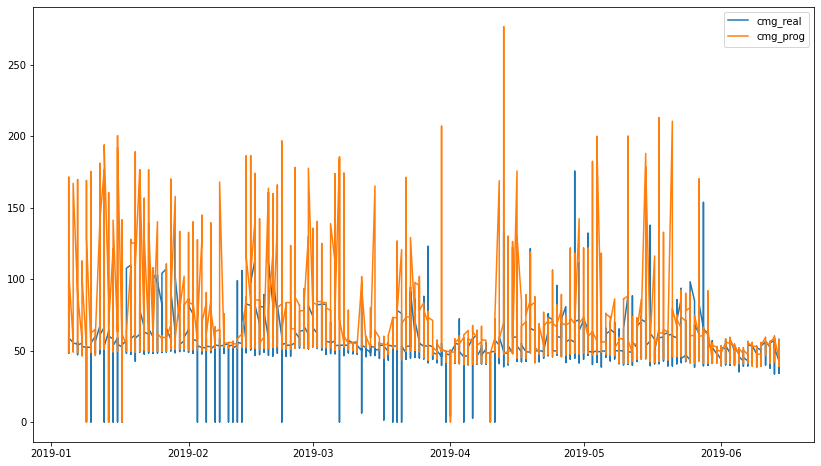

In [66]:
codigo_de_barra='BA99L117SE054L117'
fecha_ini='2019-01-05'
fecha_fin='2019-06-15'
time_plot_costo_barra(codigo_de_barra, fecha_ini, fecha_fin)

In [ ]:
# En e caso de los primeros dos graficos son muy parecidos, con pequeños cambios por ejemplo en el
#segundo al final de la curva los costos se parecian mucho, pero de repente en algún punto se se 
#que el costo marginal programado es muy alto en comparación con el real. Es las fechas de los extremos
#parece que es donde hay mas parecido en cuanto los costos.

#Ahora, viendo el caso del grafico 3 se diferencia mucho a los otros dos donde se veia claramente en ciertos
#punto donde el costo marginal programado era superior al real y con gran difrencia, pues en este último
#grafico podemos ver que hay valores negativos para los dos costos, pero en el caso del costo marginal 
#programado ocurre más veces que en el real, y del resto se observa que el costo marginal real esta
#por encima del programado en la mayoria del transcurso de las fechas.

In [73]:
#El data set que contine los datos pero solo donde el costo marginal real es cero
df_costo_cero=costo_marginal[costo_marginal['costo_en_dolares']==0]

In [74]:
df_costo_cero['barra_mnemotecnico'].value_counts()

BA01G049SE001G049    4345
BA01T002SE014T002     581
BA01T005SE284T005     524
BA01G180SE001G180     199
BA01T002SE028T002     199
                     ... 
BA01T005SE067T005      14
BA02T005SE067T005      14
BA01G271SE002G271      11
BA01T002SE025T002      11
BA02T005SE127T005       6
Name: barra_mnemotecnico, Length: 124, dtype: int64

In [75]:
#como la cantidad de filas que hay de la barra 'BA01G049SE001G049' es tan alta probaremos si esta es la barra 
#que tiene costo marginal cero durante todos los dias
len(costo_marginal[costo_marginal['barra_mnemotecnico'].isin(['BA01G049SE001G049'])])

4345

In [76]:
#como la cantidad de filas la barra 'BA01G049SE001G049' es la misma tanto para los datos completos,
#como para los que tienen solo los costos marginales reales cero, entonces esta es la barra que buscabamos
#ahora la eliminaremos del dataset

In [79]:
costo_marginal=costo_marginal[~costo_marginal['barra_mnemotecnico'].isin(['BA01G049SE001G049'])]
costo_marginal

,barra_mnemotecnico,barra_referencia_mnemotecnico,fecha,hora,costo_en_dolares,costo_en_pesos,nombre,nombre_barra,costo,desviacion,desviacion_pct,desviacion_cat
33176,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,1,50.41,35.06973,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.116286,0.293714,0.582649,0
71356,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,2,50.41,35.06973,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.522836,-0.112836,-0.223836,0
109429,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,3,49.40,34.36709,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,50.119505,-0.719505,-1.456487,0
147309,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,4,48.56,33.78271,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,49.854087,-1.294087,-2.664924,0
185370,BA01G004SE001T011,BA02T002SE032T002,2019-01-01,5,46.51,32.35654,BA S/E CANDELARIA B1 - 220KV,BA S/E CANDELARIA B1 - 220KV,49.854087,-3.344087,-7.190039,0
...,...,...,...,...,...,...,...,...,...,...,...,...
756069,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,20,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,46.800602,0.989398,2.070304,0
794030,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,21,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,48.607941,-0.817941,-1.711531,0
832100,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,22,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,48.537587,-0.747587,-1.564316,0
870153,BA99L117SE054L117,BA02T002SE032T002,2019-06-30,23,47.79,32.49051,BA S/E COLLAHUASI 220KV-BP1,BA S/E COLLAHUASI 220KV-BP1,47.783023,0.006977,0.014599,0


## Base para los modelos 

In [88]:
df_pred=pd.read_csv("base_para_prediccion.csv")
df_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,cmg_desv,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw
0,SE031G216,2019-01-04 00:00:00 UTC,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,0.57,1.02,2,1210767,13.20785
1,SE031G216,2019-01-04 00:00:00 UTC,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,0.82,1.48,2,113232,13.20785
2,SE031G216,2019-01-04 00:00:00 UTC,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,-3.33,-5.59,2,1089415,13.20785
3,SE031G216,2019-01-04 00:00:00 UTC,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,-118.18,-67.77,2,1096867,13.20785
4,SE031G216,2019-01-04 00:00:00 UTC,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,-116.62,-67.48,2,1071851,13.20785


In [89]:
df_pred.dtypes

nemotecnico_se               object
fecha                        object
hora                          int64
gen_eolica_total_mwh        float64
gen_geotermica_total_mwh    float64
gen_hidraulica_total_mwh    float64
gen_solar_total_mwh         float64
gen_termica_total_mwh       float64
cmg_real                    float64
cmg_prog                    float64
cmg_desv                    float64
cmg_desv_pct                float64
n_barras                      int64
demanda_mwh                   int64
cap_inst_mw                 float64
dtype: object

In [90]:
df_pred.shape

(112779, 15)

In [ ]:
#En estos datos tenemos 112779 filas y 15 columnas, dos object y todas las demas númericas,
#entre las object, estan las fechas, la cual pasaremos a formato de fechas a continuación.

In [91]:
#Modificamos la columna fecha, para pasarla a formato de fechas
df_pred['fecha']=pd.to_datetime(df_pred['fecha'],format='%Y-%m-%d %H:%M:%S UTC')

In [93]:
df_pred['año'] = [int(i.strftime('%Y')) for i in df_pred['fecha']]
df_pred['mes'] = [int(i.strftime('%m')) for i in df_pred['fecha']]
df_pred['sem_año']= [int(i.strftime('%W')) for i in df_pred['fecha']]
df_pred['dia_calendario']= [int(i.strftime('%j')) for i in df_pred['fecha']]
df_pred['dia_sem']= [int(i.strftime('%w')) + 1 for i in df_pred['fecha']]

In [94]:
#Si es uno, el dia es un fin de semana sino entonces es un dia de semana 
df_pred['fin_de_sem'] = np.where((df_pred['dia_sem']== 6) | (df_pred['dia_sem']==7),1,0)

In [95]:
df_pred.head()

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,cmg_desv_pct,n_barras,demanda_mwh,cap_inst_mw,año,mes,sem_año,dia_calendario,dia_sem,fin_de_sem
0,SE031G216,2019-01-04,1,NaN,NaN,NaN,NaN,0.0,56.2,55.627852,...,1.02,2,1210767,13.20785,2019,1,0,4,6,1
1,SE031G216,2019-01-04,2,NaN,NaN,NaN,NaN,0.0,56.2,55.376645,...,1.48,2,113232,13.20785,2019,1,0,4,6,1
2,SE031G216,2019-01-04,3,NaN,NaN,NaN,NaN,0.0,56.2,59.531891,...,-5.59,2,1089415,13.20785,2019,1,0,4,6,1
3,SE031G216,2019-01-04,4,NaN,NaN,NaN,NaN,0.0,56.2,174.378923,...,-67.77,2,1096867,13.20785,2019,1,0,4,6,1
4,SE031G216,2019-01-04,5,NaN,NaN,NaN,NaN,0.0,56.2,172.820310,...,-67.48,2,1071851,13.20785,2019,1,0,4,6,1


In [96]:
def plot_SE_var_diaria(codigo_subestacion,variable,lista_fechas):
    #Pasamos las fechas en formato fecha
    fechas_mod = pd.to_datetime(lista_fechas,format='%Y-%m-%d')
    
    #Realizamos una primera condicion con el codigo de subestación
    df_cond1=df_pred[df_pred['nemotecnico_se']==codigo_subestacion]
    
    #Luego, con el dataset restante debemos buscar las filas que contienen
    #las fechas que tenemos 
    df_cond2=df_cond1[df_cond1.fecha.isin(lista_fechas)]
    
    #Ahora realizamos un sort para ordenar las filas por fecha y hora
    #para que la grafica no salga extraña
    df_graf=df_cond2.sort_values(['fecha','hora'])
    
    #Valores para el eje x, que seran las horas
    x=df_graf['hora'].unique()
    
    fig = plt.figure(figsize=(14,8))
    for i in lista_fechas:
        #Conseguimos los valores de la variable que graficaremos según la
        #fecha de la lista
        ys_=df_graf[df_graf.fecha.isin([i])][variable]
        plt.plot(x,ys_)
    
    plt.legend(lista_fechas)
    plt.show()

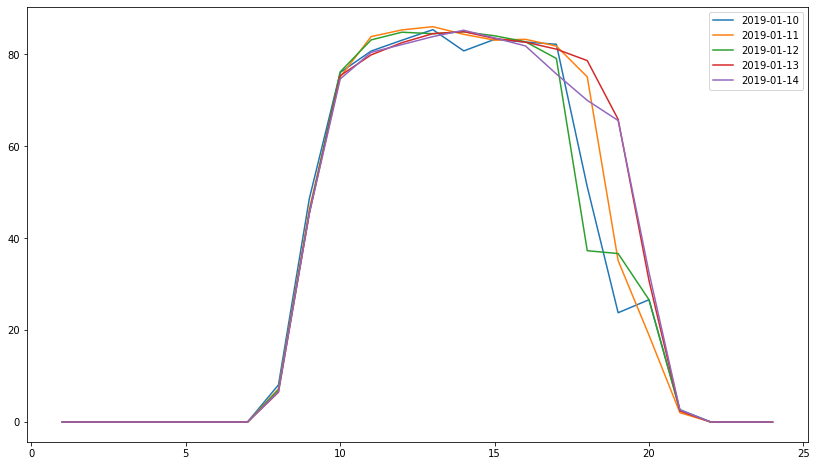

In [97]:
lista_de_fechas1=['2019-01-10','2019-01-11','2019-01-12','2019-01-13','2019-01-14']
plot_SE_var_diaria('SE005T002','gen_solar_total_mwh',lista_de_fechas1)

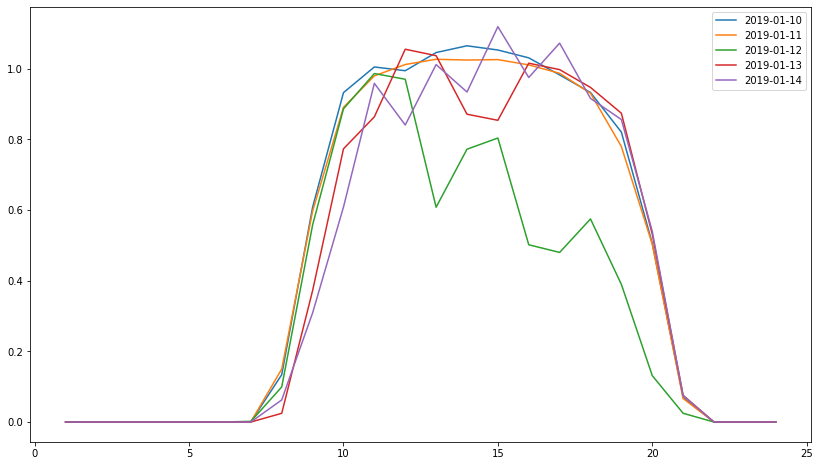

In [98]:
lista_de_fechas1=['2019-01-10','2019-01-11','2019-01-12','2019-01-13','2019-01-14']
plot_SE_var_diaria('SE127T005','gen_solar_total_mwh',lista_de_fechas1)

In [ ]:
#Según los graficamos anteriores podemos notar valores bajos en los extremos
#en el medio se nota una especie de montaña pero es mas notorio en la grafica 1,
#parece que al trancurrir de las horas la generación solar va aumentando,
#y al final del día disminuye.

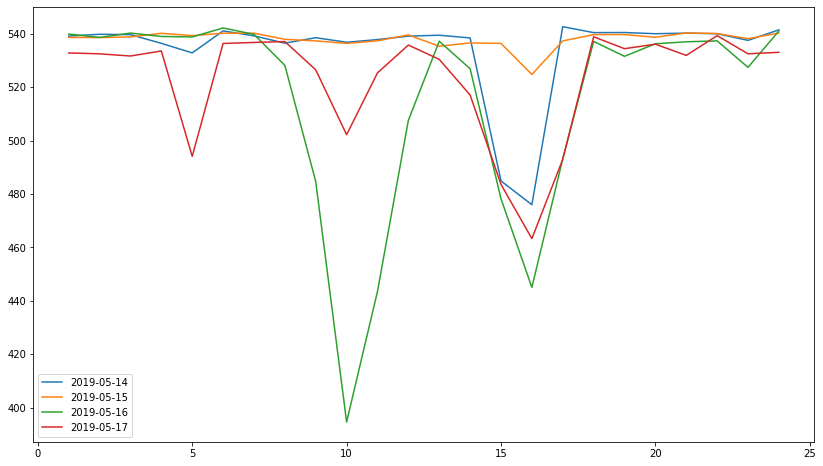

In [99]:
lista_de_fechas2=['2019-05-14','2019-05-15','2019-05-16','2019-05-17']
plot_SE_var_diaria('SE020G213','gen_termica_total_mwh',lista_de_fechas2)

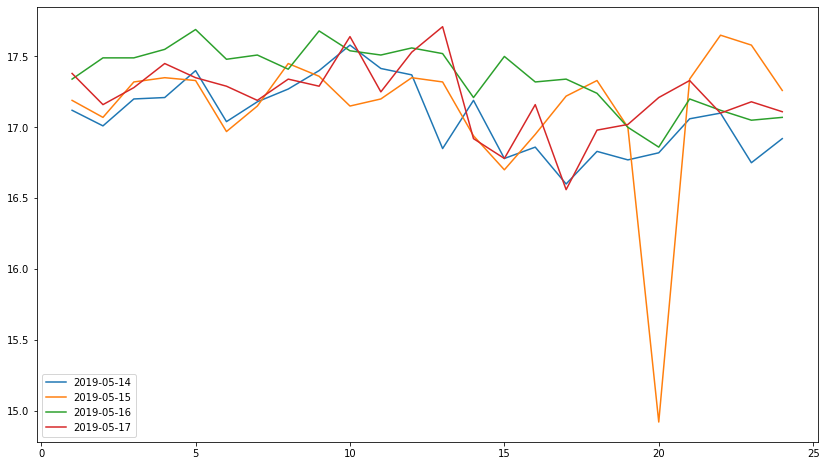

In [100]:
lista_de_fechas2=['2019-05-14','2019-05-15','2019-05-16','2019-05-17']
plot_SE_var_diaria('SE106G216','gen_termica_total_mwh',lista_de_fechas2)

In [ ]:
#En este caso la generación térmica nu parece cambiar bruscamente a traves de las horas
#al menos en el grafico anterior, solo hay un gran salto para el 15 de mayo en 
#la hora 20, y en el grafico 1 de estos con datos de la generacion termica, tambien hay
#un gran salto pero para la hora 10 del 16 de mayo

## Predicción de desviaciones del costo marginal: modelo 1

In [102]:
cond_=(df_pred['cmg_desv_pct']>=-15) & (df_pred['cmg_desv_pct']<=15)
df_pred['target']= np.where(cond_,0,1)

In [103]:
df_pred.head(10)

,nemotecnico_se,fecha,hora,gen_eolica_total_mwh,gen_geotermica_total_mwh,gen_hidraulica_total_mwh,gen_solar_total_mwh,gen_termica_total_mwh,cmg_real,cmg_prog,...,n_barras,demanda_mwh,cap_inst_mw,año,mes,sem_año,dia_calendario,dia_sem,fin_de_sem,target
0,SE031G216,2019-01-04,1,NaN,NaN,NaN,NaN,0.0,56.20,55.627852,...,2,1210767,13.20785,2019,1,0,4,6,1,0
1,SE031G216,2019-01-04,2,NaN,NaN,NaN,NaN,0.0,56.20,55.376645,...,2,113232,13.20785,2019,1,0,4,6,1,0
2,SE031G216,2019-01-04,3,NaN,NaN,NaN,NaN,0.0,56.20,59.531891,...,2,1089415,13.20785,2019,1,0,4,6,1,0
3,SE031G216,2019-01-04,4,NaN,NaN,NaN,NaN,0.0,56.20,174.378923,...,2,1096867,13.20785,2019,1,0,4,6,1,1
4,SE031G216,2019-01-04,5,NaN,NaN,NaN,NaN,0.0,56.20,172.820310,...,2,1071851,13.20785,2019,1,0,4,6,1,1
5,SE031G216,2019-01-04,6,NaN,NaN,NaN,NaN,0.0,56.20,172.820310,...,2,1038729,13.20785,2019,1,0,4,6,1,1
6,SE031G216,2019-01-04,7,NaN,NaN,NaN,NaN,0.0,56.20,133.333498,...,2,1094736,13.20785,2019,1,0,4,6,1,1
7,SE031G216,2019-01-04,8,NaN,NaN,NaN,NaN,0.0,56.20,194.045061,...,2,1161535,13.20785,2019,1,0,4,6,1,1
8,SE031G216,2019-01-04,9,NaN,NaN,NaN,NaN,0.0,52.19,52.265896,...,2,150253,13.20785,2019,1,0,4,6,1,0
9,SE031G216,2019-01-04,10,NaN,NaN,NaN,NaN,0.0,52.19,51.990403,...,2,1853882,13.20785,2019,1,0,4,6,1,0


In [104]:
#verificare cuantos na hay en las columnas de nuestro dataset
df_pred.isna().sum()

nemotecnico_se                   0
fecha                            0
hora                             0
gen_eolica_total_mwh        112779
gen_geotermica_total_mwh    112779
gen_hidraulica_total_mwh     78595
gen_solar_total_mwh          70961
gen_termica_total_mwh        50916
cmg_real                         0
cmg_prog                         0
cmg_desv                         0
cmg_desv_pct                     0
n_barras                         0
demanda_mwh                      0
cap_inst_mw                      0
año                              0
mes                              0
sem_año                          0
dia_calendario                   0
dia_sem                          0
fin_de_sem                       0
target                           0
dtype: int64